In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("E:\Data Science\datasets\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


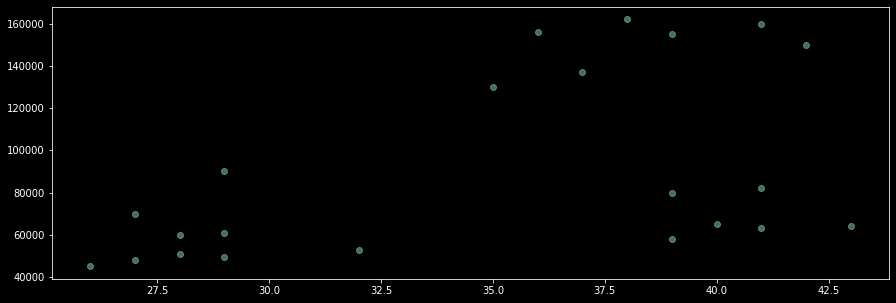

In [3]:
plt.style.use(["dark_background"])
plt.rcParams["figure.figsize"] = (15, 5)

plt.scatter(df["Age"], df["Income($)"], alpha=0.5)

In [4]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age", "Income($)"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

Text(0, 0.5, 'Income in ($)')

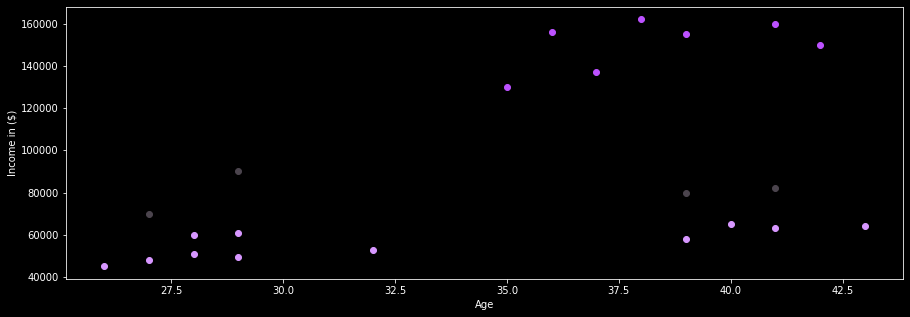

In [5]:
df["cluster"] = y_pred

cl1 = df[df.cluster == 0]
cl2 = df[df.cluster == 1]
cl3 = df[df.cluster == 2]

plt.scatter(cl1["Age"], cl1["Income($)"], c="#4b444d")
plt.scatter(cl2["Age"], cl2["Income($)"], c="#bc51ff")
plt.scatter(cl3["Age"], cl3["Income($)"], c="#d797ff")

plt.xlabel("Age")
plt.ylabel("Income in ($)")

Scaling the dataset 

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[["Age"]])
df[["Age"]] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income($)"]])
df[["Income($)"]] = scaler.transform(df[["Income($)"]])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [8]:
df.drop(["cluster"], axis="columns", inplace=True)

In [9]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age", "Income($)"]])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [10]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [11]:
cen = km.cluster_centers_
cen

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

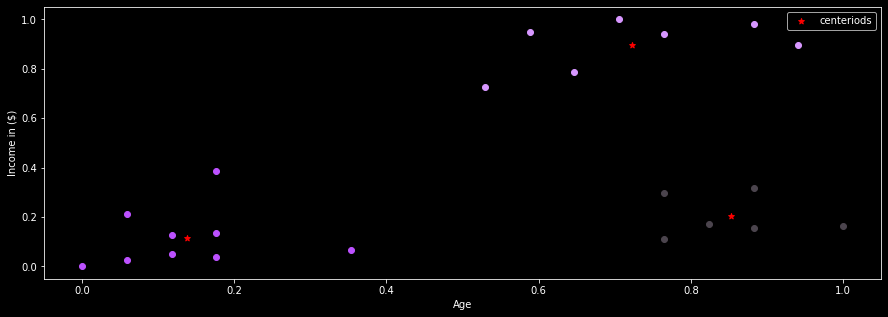

In [12]:
df["cluster"] = y_pred

cl1 = df[df.cluster == 0]
cl2 = df[df.cluster == 1]
cl3 = df[df.cluster == 2]

plt.scatter(cl1["Age"], cl1["Income($)"], c="#4b444d")
plt.scatter(cl2["Age"], cl2["Income($)"], c="#bc51ff")
plt.scatter(cl3["Age"], cl3["Income($)"], c="#d797ff")

# ploting the centeriods
plt.scatter(cen[:,0], cen[:,1], c="red", marker='*', label="centeriods")

plt.xlabel("Age")
plt.ylabel("Income in ($)")

plt.legend()

 Lets get the k, that is the number of cluster by finding the sse 

In [14]:
k_rg = range(1, 10)
sse = []
for k in k_rg:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.17681044133887713,
 0.1407244898535231,
 0.10188787724979426]

<br>Using the Elbow method we will find the optimal number of clusters

Text(0.5, 0, 'Range of 10')

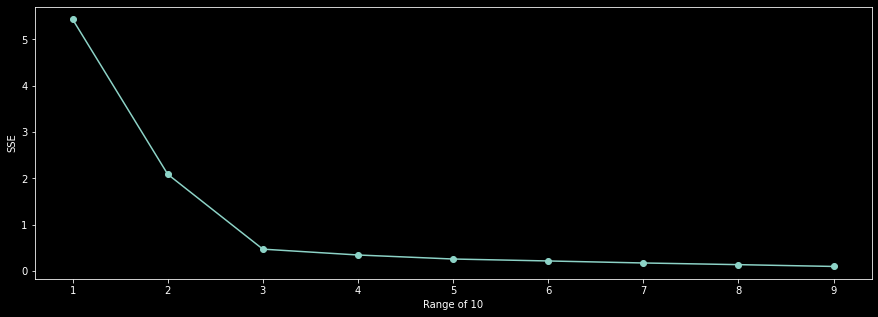

In [24]:
plt.plot(k_rg, sse, marker='o')

plt.ylabel("SSE")
plt.xlabel("Range of 10")

<br>
The graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow method. The graph for the elbow method looks like the below image

So as we can see here, <em style="color:red">k=3</em> is the optimal number of clusters